# Liner Regression : Y=b0+b1x <br>
Y is the target <br>
x is the predictor<br>
b0 is the bias<br>
b1 is the weight in the regression equation

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [212]:
df=pd.read_csv('Cars.csv')

In [213]:
df.head()

,Weeks Worked,Car Sold
0,169,272
1,427,300
2,295,311
3,391,365
4,79,165


In [214]:
x=pd.Series(df["Weeks Worked"]).array
y=pd.Series(df["Car Sold"]).array

<AxesSubplot:xlabel='Weeks Worked', ylabel='Car Sold'>

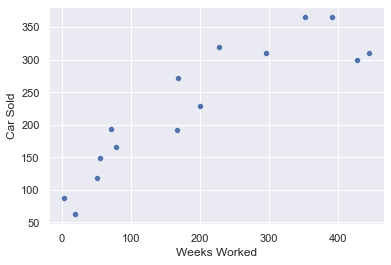

In [215]:
sns.scatterplot(x="Weeks Worked", y="Car Sold", data=df)

<AxesSubplot:xlabel='Weeks Worked', ylabel='Car Sold'>

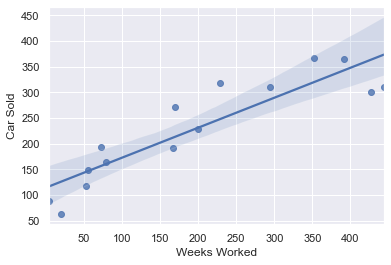

In [216]:
sns.regplot(x="Weeks Worked", y="Car Sold", data=df)

In [217]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 114.2699098867777 + 0.584β
Correlation Coef.:  0.8962069297547376
"Goodness of Fit":  0.8031868609404131


<AxesSubplot:>

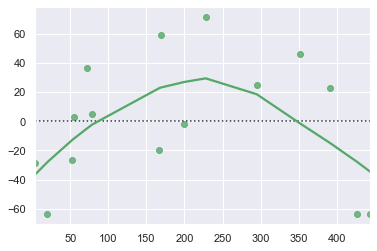

In [73]:
sns.residplot(x=x, y=y, lowess=True, color="g")

# Non Linear Regression : Y=b0+b1x+b2x²+...bnx^n <br>
Y is the target <br>
x is the predictor<br>
b0 is the bias<br>
b1 is the weight of the dependant variable
b2 is the weight of the square of the dependant variable

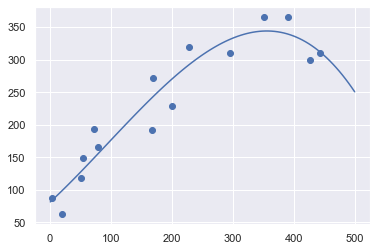

In [220]:
x=df["Weeks Worked"]
y=df["Car Sold"]
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1,500,100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [221]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(x, y,3 ))
print(r2_score(y, mymodel(x)))

0.9164214323588359


<AxesSubplot:xlabel='Weeks Worked', ylabel='Car Sold'>

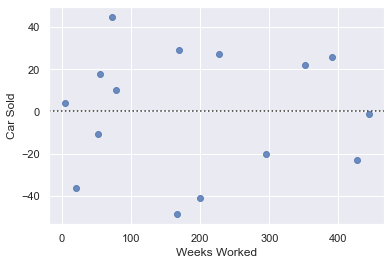

In [105]:
sns.residplot(x, y, order=3)

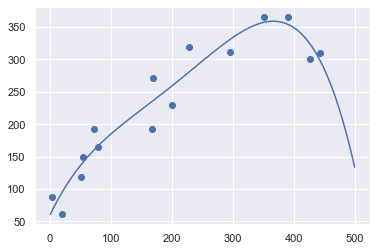

In [40]:
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline = np.linspace(1,500,100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

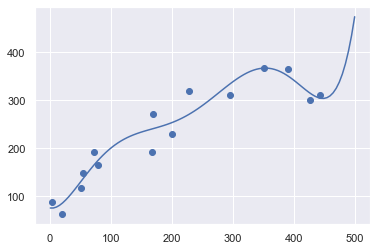

In [43]:
mymodel = np.poly1d(np.polyfit(x, y, 6))
myline = np.linspace(1,500,100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# BIC = n*log(SSE) + log(n) * k

In [117]:
x = np.array([169,427,295,391,79,55,352,444,167,200,4,52,20,228,72])
y= np.array([272,300,311,365,165,149,366,310,192,229,88,118,62,319,193])

In [113]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [115]:
num_params = len(lr.coef_) + 1
print('Number of parameters: %d' % (num_params))

Number of parameters: 2


In [120]:
yhat = lr.predict(x.reshape(-1, 1))
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

MSE: 1821.059


In [131]:
np.log(ssr)

12.364169813433264

In [134]:
len(x)*np.log(ssr)+np.log(len(x))*1

188.17059740260117

In [135]:
len(x)*np.log(ssr)+np.log(len(x))*2

190.8786476037034

In [136]:
len(x)*np.log(ssr)+np.log(len(x))*3

193.5866978048056

In [137]:
len(x)*np.log(ssr)+np.log(len(x))*4

196.29474800590782

In [138]:
len(x)*np.log(ssr)+np.log(len(x))*5

199.00279820701002

In [143]:
(2*np.log(len(x))-2*np.log(yhat)).sum()

-79.62674082934751

In [144]:
(np.log(len(x))-2*np.log(yhat)).sum()

-120.24749384588064

In [179]:
l1=[]
l2=[]
for i in range(10):
    a=(i*np.log(15)-2*np.log(yhat.sum()))
    i=i+1
    l1.append(a)
    l2.append(i)


<AxesSubplot:>

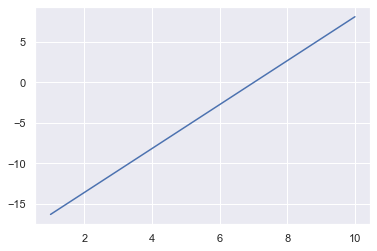

In [181]:
sns.lineplot(l2,l1)

In [183]:
# read data_set
data = pd.read_csv("Wage.csv")
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [184]:
data_x = data['age']
data_y = data['wage']

In [185]:
# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

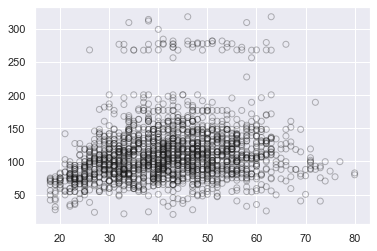

In [186]:
# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

In [193]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

[0.72190831]
80.65287740759283


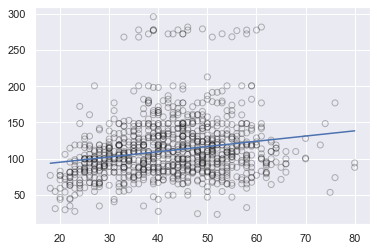

In [198]:
# Prediction on validation dataset
valid_x = valid_x.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [200]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)

40.436687488017256


[ -0.05194765   5.22868974 -10.03406116]


[ -0.05194765   5.22868974 -10.03406116]


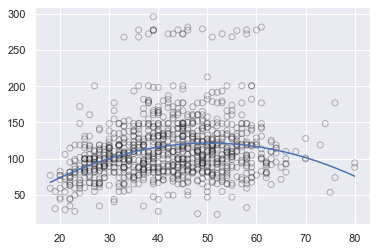

In [205]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

[-4.58962275e-05  9.10115001e-03 -6.94994507e-01  2.42916196e+01
 -2.08514898e+02]


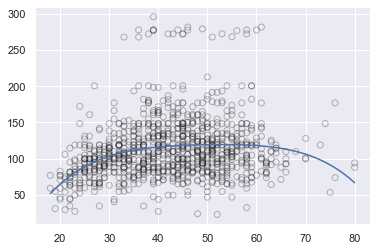

In [207]:
# Generating weights for polynomial function with degree =4
weights = np.polyfit(train_x, train_y, 4)
print(weights)
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

[-1.41650871e-15  8.19172465e-13 -2.14615817e-10  3.36460425e-08
 -3.51041978e-06  2.56343693e-04 -1.34080582e-02  5.05072955e-01
 -1.35694809e+01  2.53026613e+02 -3.10207351e+03  2.24158934e+04
 -7.20795621e+04]


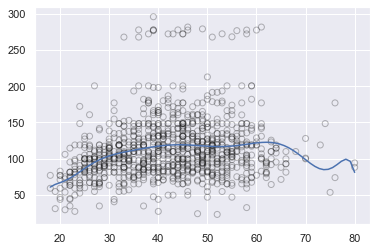

In [208]:
# Generating weights for polynomial function with degree =12
weights = np.polyfit(train_x, train_y, 12)
print(weights)
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()